## 第4章 Matplotlibでグラフを 描画しよう

### 4-6: ヒストグラム

In [1]:
import numpy as np
import matplotlib.pyplot as plt

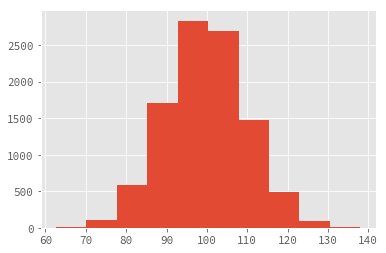

In [2]:
# リスト4.6.1：ヒストグラムの描画
plt.style.use("ggplot")
# データセットの作成
mu = 100  # 平均値
sigma = 10  # 標準偏差
np.random.seed(0)
x = np.random.normal(mu, sigma, 10000)
# ヒストグラムの描画
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x)
plt.show()

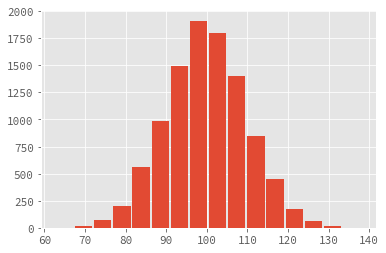

In [3]:
# リスト4.6.2：引数を指定したヒストグラムの描画
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x, rwidth=0.9, bins=16)
plt.show()

In [4]:
# リスト4.6.3：anime_master.csvファイルの読み込み
import os
import pandas as pd

base_url = "https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/"
anime_master_csv = os.path.join(base_url, "anime_master.csv")
df = pd.read_csv(anime_master_csv, index_col="anime_id")
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


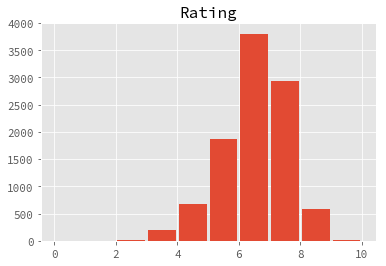

In [5]:
# リスト4.6.4：レーティングの可視化
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df["rating"], range=(0, 10), rwidth=0.9)
ax.set_title("Rating")
plt.show()

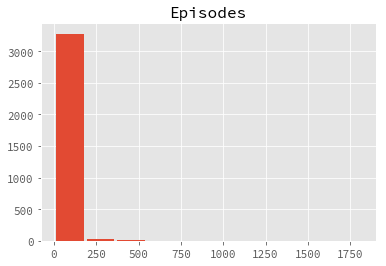

In [6]:
# リスト4.6.5：エピソード数の可視化
fig = plt.figure()
ax = fig.add_subplot(111)
df_tv = df[df["type"] == "TV"]
ax.hist(df_tv["episodes"], rwidth=0.9)
ax.set_title("Episodes")
plt.show()

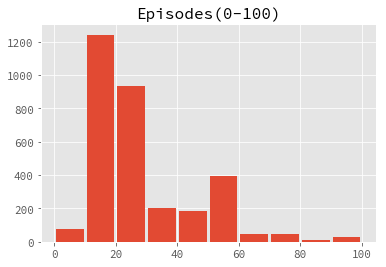

In [7]:
# リスト4.6.6：ヒストグラムの範囲指定
fig = plt.figure()
ax = fig.add_subplot(111)
# rangeの値を （0，100） に指定します。
ax.hist(df_tv["episodes"], rwidth=0.9, range=(0, 100))
ax.set_title("Episodes(0-100)")
plt.show()

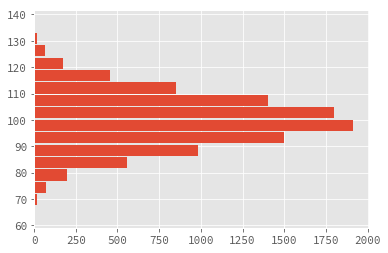

In [8]:
# リスト4.6.7：横向きのヒストグラムの描画
np.random.seed(0)
x = np.random.normal(100, 10, 10000)
fig = plt.figure()
ax = fig.add_subplot(111)
# orientationをhorizontalに指定
ax.hist(x, rwidth=0.9, bins=16, orientation="horizontal")
plt.show()

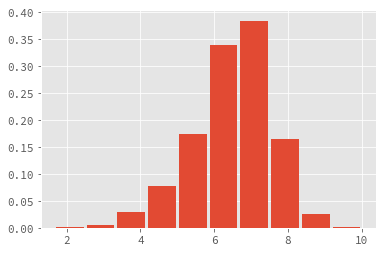

In [9]:
# リスト4.6.8：相対度数のヒストグラムの描画
fig = plt.figure()
ax = fig.add_subplot(111)
# normedをTrueに指定
ax.hist(df["rating"], normed=True, rwidth=0.9)
plt.show()

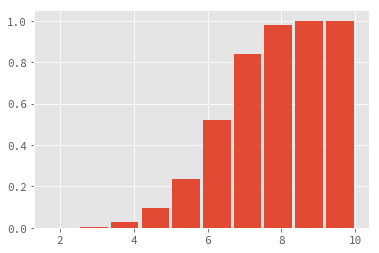

In [10]:
# リスト4.6.9：相対度数の累積ヒストグラムの描画
fig = plt.figure()
ax = fig.add_subplot(111)
# cumulativeをTrueに指定
ax.hist(df["rating"], normed=True, cumulative=True, rwidth=0.9)
plt.show()

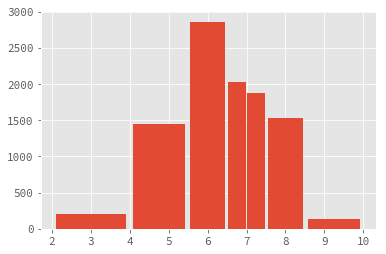

In [11]:
# リスト4.6.10：階級幅を設定したヒストグラムの描画
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df["rating"], bins=[2, 4, 5.5, 6.5, 7, 7.5, 8.5, 10], rwidth=0.9)
plt.show()

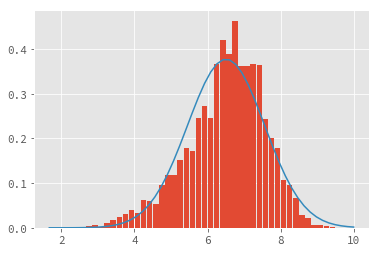

In [12]:
# リスト4.6.11：近似曲線の追加
bins = 50  # ビン数
dfmin = np.min(df["rating"])  # データの最小値
dfmax = np.max(df["rating"])  # データの最大値
# ヒストグラムの描画
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df["rating"], bins=bins, range=(dfmin, dfmax), normed=True, rwidth=0.9)
# 平均と標準偏差
mu, sigma = df["rating"].mean(), df["rating"].std()
# X値
x = np.linspace(dfmin, dfmax, bins)  # ビンの区切りの値
# 近似的な確率密度関数を使用してY値を生成
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
# 近似曲線の描画
ax.plot(x, y)
plt.show()

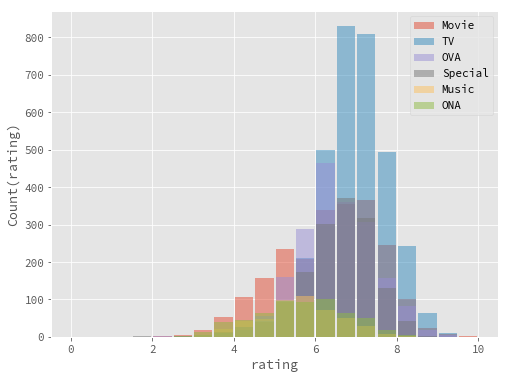

In [13]:
# リスト4.6.12：複数グループのヒストグラムを重ねて描画
types = df["type"].unique()
labels = types.tolist()
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
b_num = np.arange(0, 10.5, 0.5)
for t in types:
    ax.hist(df.loc[df["type"] == t, "rating"], bins=b_num, rwidth=0.9, alpha=0.5, label=t)
ax.legend()
ax.set_xlabel("rating")
ax.set_ylabel("Count(rating)")
plt.show()

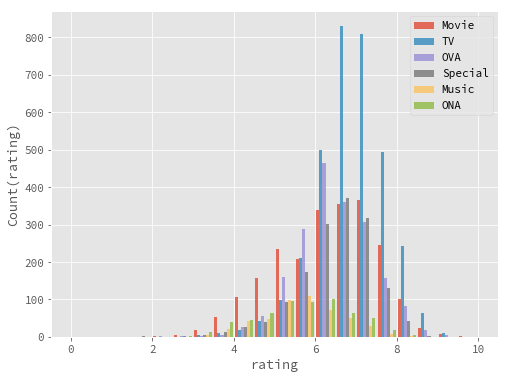

In [14]:
# リスト4.6.13：複数グループのヒストグラムを並べて描画
# データセットの作成
dataset = [df.loc[df["type"] == t, "rating"] for t in types]
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.hist(dataset, bins=np.arange(0, 10.5, 0.5), rwidth=0.9, alpha=0.8, label=labels)
ax.legend()
ax.set_xlabel("rating")
ax.set_ylabel("Count(rating)")
plt.show()

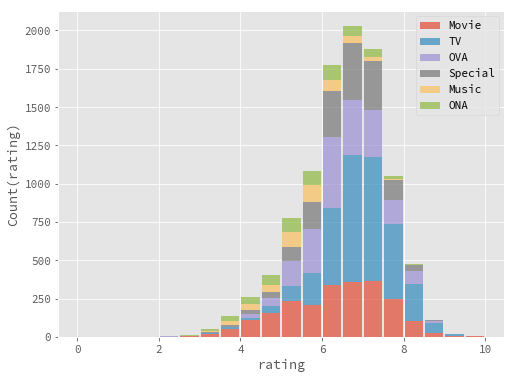

In [15]:
# リスト4.6.14：積み上げヒストグラムの描画
# dataset, labelsは 「並べて描画」 で作成したものを使用
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.hist(dataset,
        bins=np.arange(0, 10.5, 0.5),
        rwidth=0.9,
        alpha=0.7,
        label=labels,
        stacked=True)
ax.legend()
ax.set_xlabel("rating")
ax.set_ylabel("Count(rating)")
plt.show()